# Aerodynamic Roughness Length

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [ ]:
# Import the roughness data with semicolon delimiter
file_path = r"H:\_SILVEX II 2025\Data\SILVEX2_Silvia2_roughness_data.CSV"
df = pd.read_csv(file_path, sep=';', low_memory=False)

# Inspect the data
print("Shape:", df.shape)
#print("\nFirst few rows:")
#print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
print(df.describe())

Shape: (43166, 47)

Column names:
['date', 'time', 'wind_speed_1m', 'wind_dir_1m', 'u*_1m', 'TKE_1m', 'L_1m', '(z-d)/L_1m', 'T*_1m', 'footprintmodel_1m', 'x_peak_1m', 'x_offset_1m', 'x_10%_1m', 'x_30%_1m', 'x_50%_1m', 'x_70%_1m', 'x_90%_1m', 'wind_speed_2m', 'wind_dir_2m', 'u*_2m', 'TKE_2m', 'L_2m', '(z-d)/L_2m', 'T*_2m', 'footprintmodel_2m', 'x_peak_2m', 'x_offset_2m', 'x_10%_2m', 'x_30%_2m', 'x_50%_2m', 'x_70%_2m', 'x_90%_2m', 'wind_speed_3m', 'wind_dir_3m', 'u*_3m', 'TKE_3m', 'L_3m', '(z-d)/L_3m', 'T*_3m', 'footprintmodel_3m', 'x_peak_3m', 'x_offset_3m', 'x_10%_3m', 'x_30%_3m', 'x_50%_3m', 'x_70%_3m', 'x_90%_3m']

Basic statistics:
              date   time wind_speed_1m wind_dir_1m     u*_1m    TKE_1m  \
count        43166  43166         34009       34009     34009     34009   
unique          32   1441         32888       30829     33061     33503   
top     25.06.2025  11:05       1.54052     111.432  0.105708  0.165557   
freq          1440     30             3           5      

## 1. Data inspection

Plots of the time series of $\frac{z-d}{L}$, $u*$, and the wind direction for all three sensor levels.

In [ ]:
# Clean data once and convert all relevant columns to numeric
df_clean = df.iloc[1:].copy()
numeric_cols = [
    'wind_speed_1m', 'wind_dir_1m', 'u*_1m', 'TKE_1m', 'L_1m', '(z-d)/L_1m', 'T*_1m', 
    'footprintmodel_1m', 'x_peak_1m', 'x_offset_1m', 'x_10%_1m', 'x_30%_1m', 'x_50%_1m', 'x_70%_1m', 'x_90%_1m',
    'wind_speed_2m', 'wind_dir_2m', 'u*_2m', 'TKE_2m', 'L_2m', '(z-d)/L_2m', 'T*_2m', 
    'footprintmodel_2m', 'x_peak_2m', 'x_offset_2m', 'x_10%_2m', 'x_30%_2m', 'x_50%_2m', 'x_70%_2m', 'x_90%_2m',
    'wind_speed_3m', 'wind_dir_3m', 'u*_3m', 'TKE_3m', 'L_3m', '(z-d)/L_3m', 'T*_3m', 
    'footprintmodel_3m', 'x_peak_3m', 'x_offset_3m', 'x_10%_3m', 'x_30%_3m', 'x_50%_3m', 'x_70%_3m', 'x_90%_3m',
]
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Create datetime index and alias for plotting
df_clean['datetime'] = pd.to_datetime(df_clean['date'] + ' ' + df_clean['time'], format='%d.%m.%Y %H:%M')
df_clean_indexed = df_clean.set_index('datetime')
df_plot = df_clean_indexed

# Stability cutoff: remove values outside [-2, 2] for all levels ()
for col in ['(z-d)/L_1m', '(z-d)/L_2m', '(z-d)/L_3m']:
    df_clean.loc[(df_clean[col] > 2) | (df_clean[col] < -2), col] = np.nan

print(df_clean[['(z-d)/L_1m', '(z-d)/L_2m', '(z-d)/L_3m']].describe())

         (z-d)/L_1m    (z-d)/L_2m    (z-d)/L_3m
count  31777.000000  32327.000000  32959.000000
mean       0.254376      0.314917      0.295696
std        0.460381      0.462018      0.433339
min       -1.991680     -1.998570     -1.998860
25%        0.022669      0.038857      0.040676
50%        0.128237      0.182395      0.179189
75%        0.389957      0.489383      0.446802
max        1.999450      1.999100      1.997760


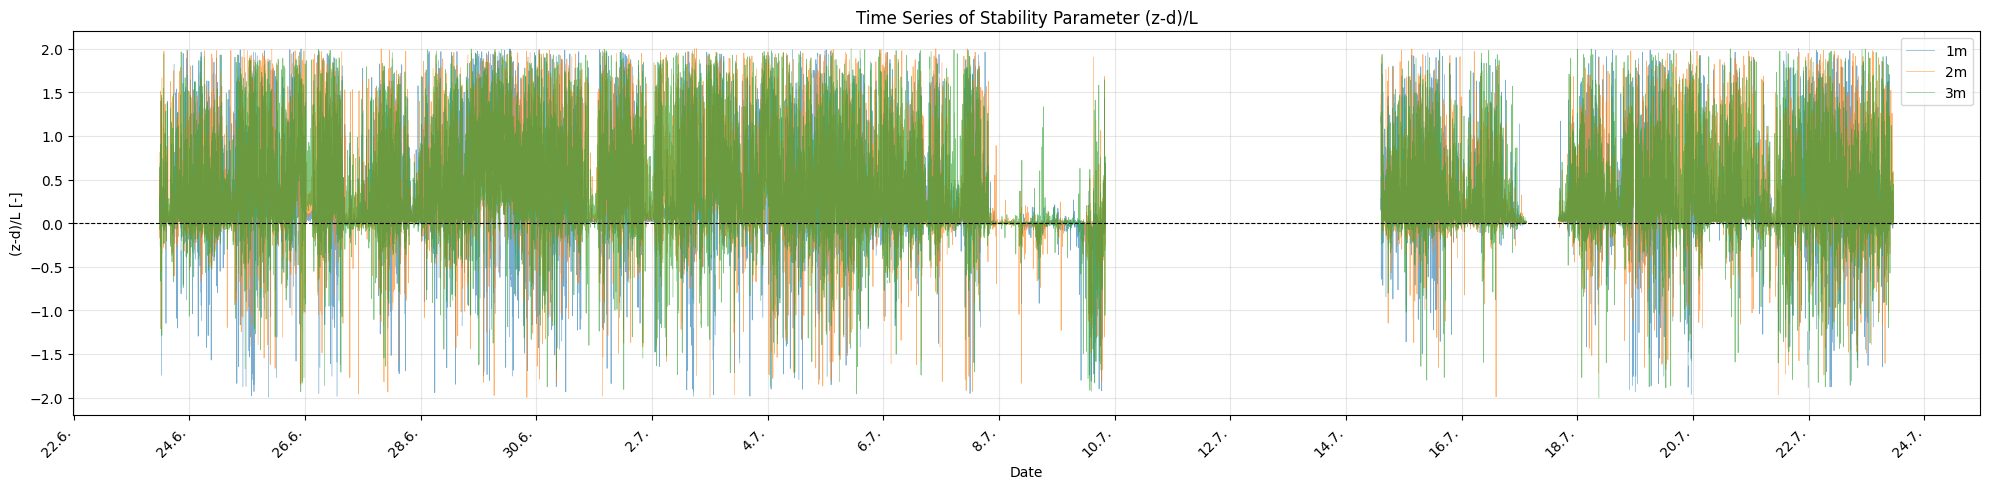

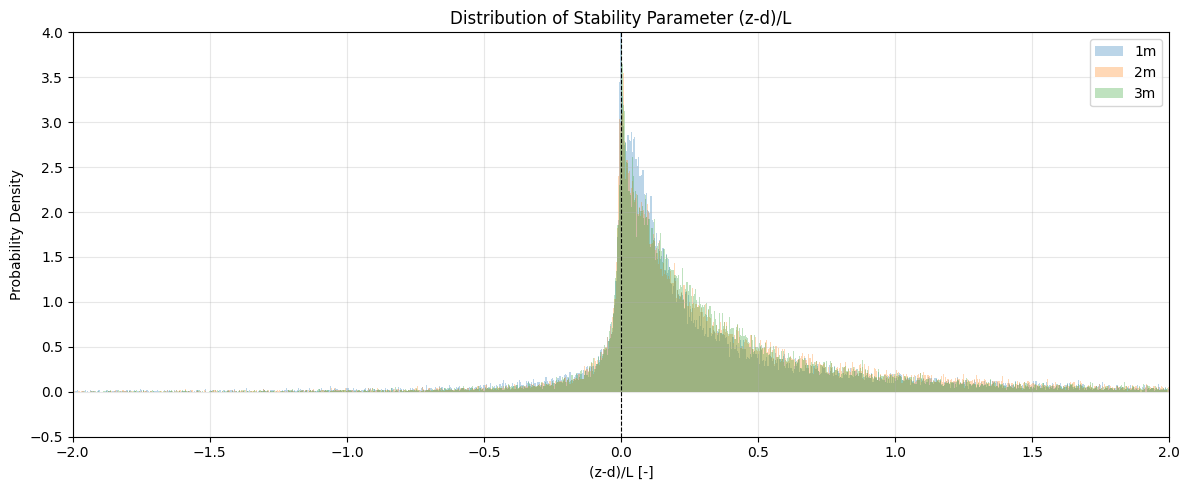

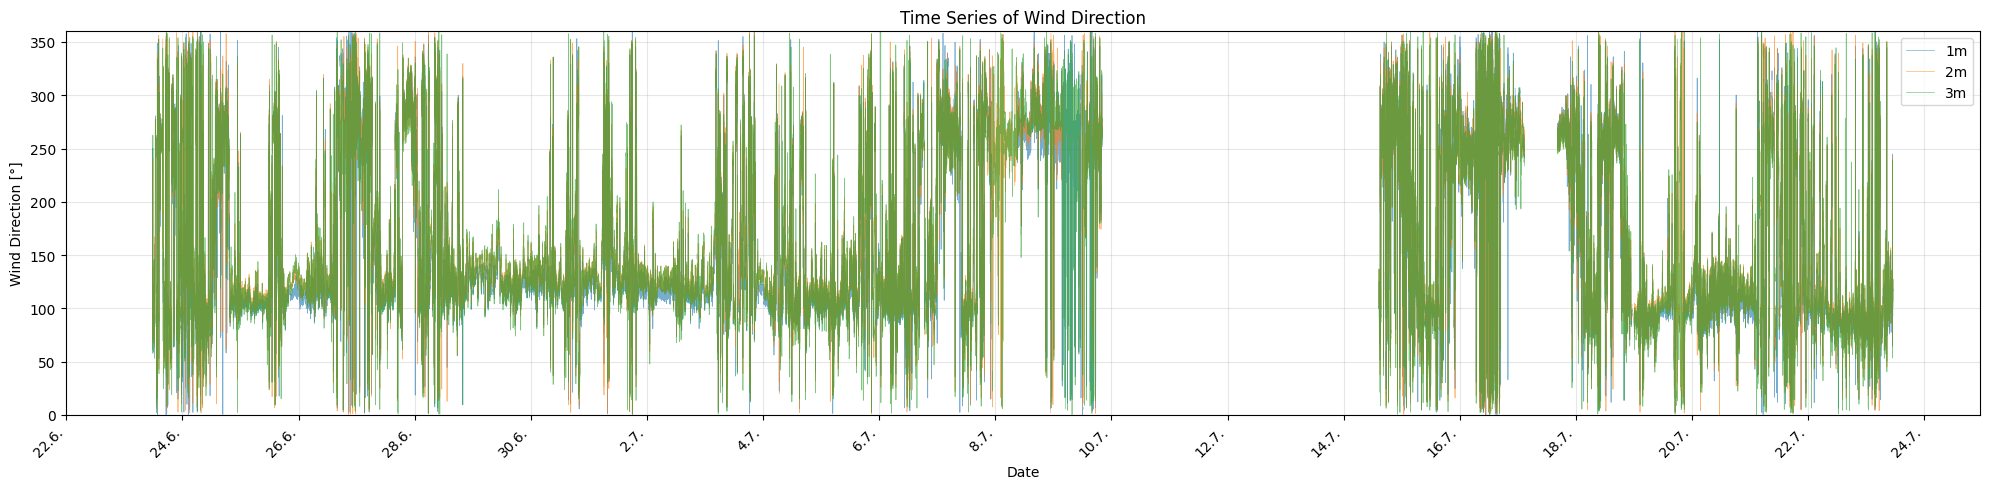

In [ ]:
# Custom formatter to remove leading zeros from month
def custom_date_formatter(x, pos):
    date = mdates.num2date(x)
    return f"{date.day}.{date.month}."

# 1. Time series of stability parameter (z-d)/L
fig1, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(df_plot.index, df_plot['(z-d)/L_1m'], label='1m', alpha=0.6, linewidth=0.5)
ax1.plot(df_plot.index, df_plot['(z-d)/L_2m'], label='2m', alpha=0.6, linewidth=0.5)
ax1.plot(df_plot.index, df_plot['(z-d)/L_3m'], label='3m', alpha=0.6, linewidth=0.5)
ax1.set_ylabel('(z-d)/L [-]')
ax1.set_xlabel('Date')
ax1.set_title('Time Series of Stability Parameter (z-d)/L')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax1.xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
fig1.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Distribution of stability parameter (z-d)/L
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.hist(df_plot['(z-d)/L_1m'].dropna(), bins=1000, alpha=0.3, label='1m', density=True)
ax2.hist(df_plot['(z-d)/L_2m'].dropna(), bins=1000, alpha=0.3, label='2m', density=True)
ax2.hist(df_plot['(z-d)/L_3m'].dropna(), bins=1000, alpha=0.3, label='3m', density=True)
ax2.set_xlabel('(z-d)/L [-]')
ax2.set_ylabel('Probability Density')
ax2.set_title('Distribution of Stability Parameter (z-d)/L')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
ax2.set_xlim(-2, 2)
ax2.set_ylim(-0.5,4)
plt.tight_layout()
plt.show()

# 3. Time series of wind direction
fig3, ax3 = plt.subplots(figsize=(20, 5))
ax3.plot(df_plot.index, df_plot['wind_dir_1m'], label='1m', alpha=0.6, linewidth=0.5)
ax3.plot(df_plot.index, df_plot['wind_dir_2m'], label='2m', alpha=0.6, linewidth=0.5)
ax3.plot(df_plot.index, df_plot['wind_dir_3m'], label='3m', alpha=0.6, linewidth=0.5)
ax3.set_ylabel('Wind Direction [°]')
ax3.set_xlabel('Date')
ax3.set_title('Time Series of Wind Direction')
ax3.set_ylim(0, 360)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=2))
fig3.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Aerodynamic roughness length

Compute aerodynamic roughness length from two equations:
1. The first one being derived from the standard MOST log wind profile (for neutral conditions): $$u_z = \frac{u_*}{\kappa} \ln \left(\frac{z}{z_0} \right) \quad \Longrightarrow \quad z_0 = z \exp\left( - \frac{u_z \kappa}{u_*} \right)$$ with the wind speed $u_z$ at height $z$, friction velocity $u_*$, the von Kármán constant $\kappa = 0.41$, and aerodynamic roughness length $z_0$.
2. The second one including a correction factor for stability: $$u_z = \frac{u_*}{\kappa} \left[ \ln \left(\frac{z}{z_0} \right) + \psi \left(\frac{z}{L} \right) \right] $$ with the correction factor $\psi\left(\frac{z}{L} \right) = 4.7 \frac{z}{L}$ [Businger et al. 1971, and Dyer 1974]. Then $$z_0 = z \exp\left( - \frac{u_z \kappa}{u_*} + 4.7 \frac{z}{L}\right)$$

In [35]:
kappa = 0.41 # von Karman constant
z1 = 1.1 # m
z2 = 2.1 # m
z3 = 3.1 # m

In [ ]:
# Use the already-cleaned dataframe for roughness calculations
df_z0 = df_clean.copy()

# Compute aerodynamic roughness length z_0 for each level
# Formula (assuming neutral conditions): u_z = (u* / kappa) * ln(z/z_0)
# Solving for z_0: z_0 = z * exp(-u_z * kappa / u*)

df_z0['z0_1m'] = z1 * np.exp(-df_z0['wind_speed_1m'] * kappa / df_z0['u*_1m'])
df_z0['z0_2m'] = z2 * np.exp(-df_z0['wind_speed_2m'] * kappa / df_z0['u*_2m'])
df_z0['z0_3m'] = z3 * np.exp(-df_z0['wind_speed_3m'] * kappa / df_z0['u*_3m'])

df_z0['z0_stable_1m'] = z1 * np.exp(-df_z0['wind_speed_1m'] * kappa / df_z0['u*_1m'] + 4.7 * df_z0['(z-d)/L_1m'])
df_z0['z0_stable_2m'] = z2 * np.exp(-df_z0['wind_speed_2m'] * kappa / df_z0['u*_2m'] + 4.7 * df_z0['(z-d)/L_2m'])
df_z0['z0_stable_3m'] = z3 * np.exp(-df_z0['wind_speed_3m'] * kappa / df_z0['u*_3m'] + 4.7 * df_z0['(z-d)/L_3m'])

# Display basic statistics for the computed roughness lengths
print("Aerodynamic Roughness Length Statistics:\n")
print(df_z0[['z0_1m', 'z0_2m', 'z0_3m']].describe(), "\n")
print(df_z0[['z0_stable_1m', 'z0_stable_2m', 'z0_stable_3m']].describe())
print("\n\nFirst few values:")
print(df_z0[['date', 'time', 'wind_speed_1m', 'u*_1m', 'z0_1m', 
                'wind_speed_2m', 'u*_2m', 'z0_2m',
                'wind_speed_3m', 'u*_3m', 'z0_3m']].head(10))

# keep the enriched dataframe for downstream plots
df_clean = df_z0

Aerodynamic Roughness Length Statistics:

              z0_1m         z0_2m         z0_3m
count  3.400800e+04  3.438700e+04  3.475100e+04
mean   3.925731e-02  9.376737e-02  1.763937e-01
std    1.167535e-01  2.448047e-01  4.081551e-01
min    3.225876e-82  3.656275e-75  9.361238e-87
25%    2.658558e-07  5.784661e-06  5.703449e-05
50%    1.742684e-04  1.485336e-03  7.056204e-03
75%    9.902634e-03  4.323023e-02  1.174589e-01
max    1.093301e+00  2.070762e+00  3.010233e+00 

       z0_stable_1m  z0_stable_2m  z0_stable_3m
count  3.177700e+04  3.232700e+04  3.295900e+04
mean   2.512746e-01  9.741070e-01  2.313588e+00
std    1.224436e+01  3.735973e+01  6.490753e+01
min    2.686298e-71  4.916046e-41  2.265462e-46
25%    7.917686e-06  1.310313e-04  8.151927e-04
50%    7.743075e-04  7.779696e-03  2.814789e-02
75%    2.699310e-02  1.162211e-01  2.905071e-01
max    1.935760e+03  4.338671e+03  6.152813e+03


First few values:
                           date   time  wind_speed_1m     u*_1m     z0_1

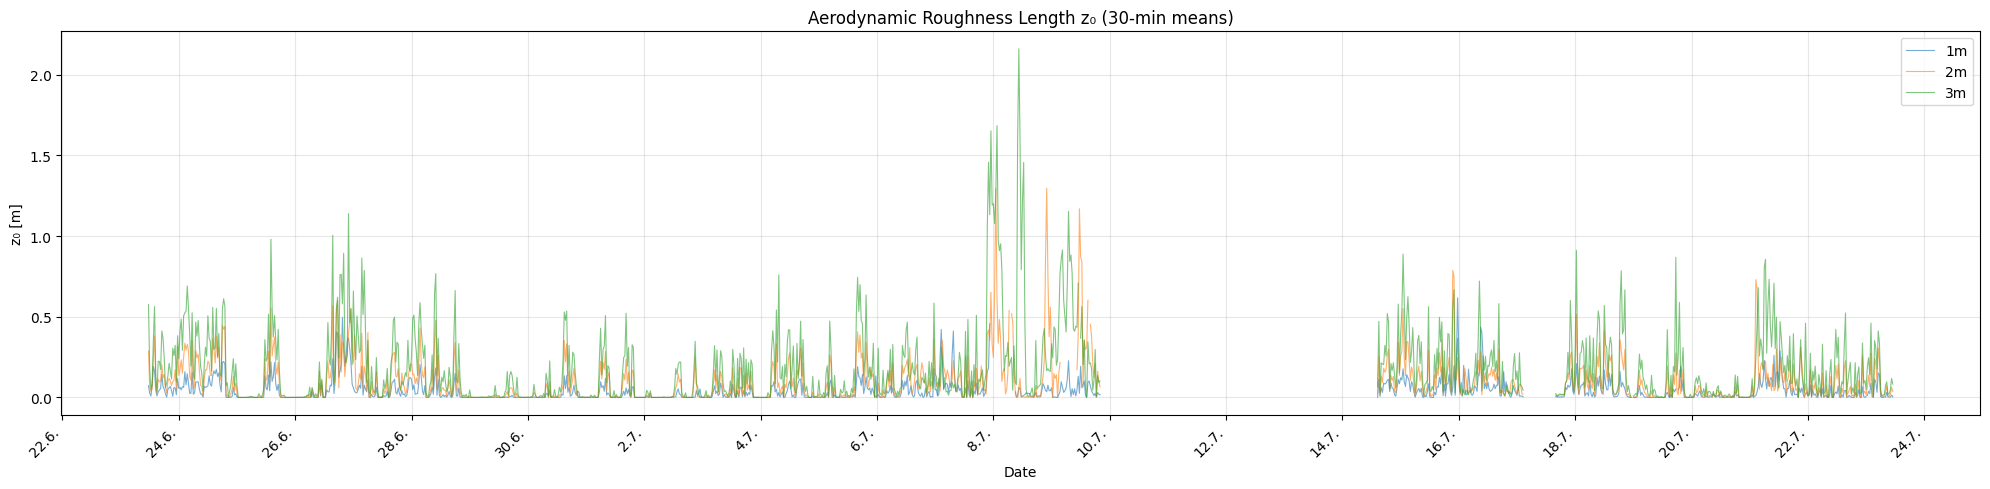

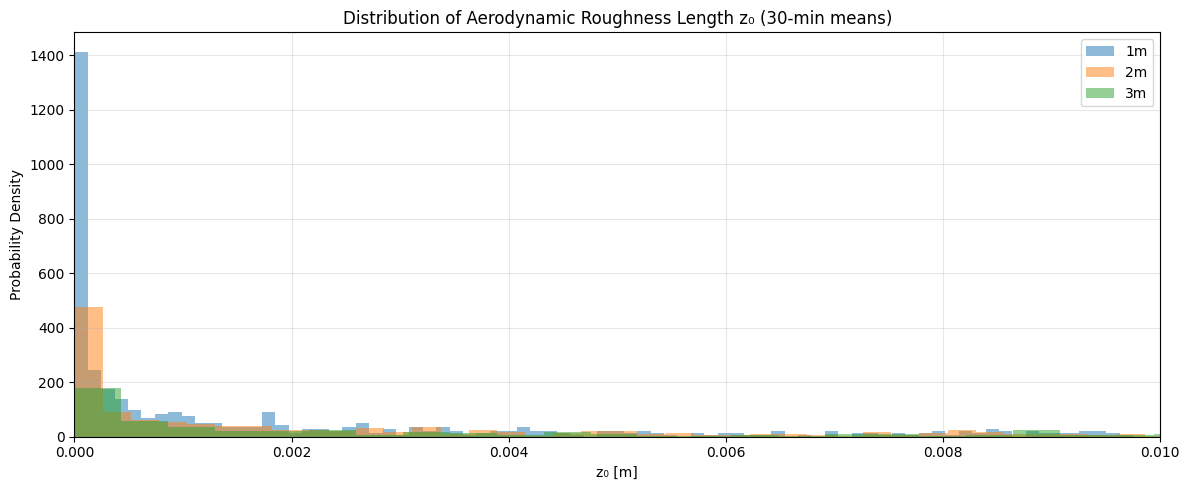

In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Use existing time index and resample to 30-minute means
df_resampled = df_clean_indexed[['z0_1m', 'z0_2m', 'z0_3m']].resample('30min').mean()

# Custom formatter to remove leading zeros from month
def custom_date_formatter(x, pos):
    date = mdates.num2date(x)
    return f"{date.day}.{date.month}."

# 1. Time series of roughness length z0 (30-min means)
fig1, ax1 = plt.subplots(figsize=(20, 5))
ax1.plot(df_resampled.index, df_resampled['z0_1m'], label='1m', alpha=0.6, linewidth=0.8)
ax1.plot(df_resampled.index, df_resampled['z0_2m'], label='2m', alpha=0.6, linewidth=0.8)
ax1.plot(df_resampled.index, df_resampled['z0_3m'], label='3m', alpha=0.6, linewidth=0.8)
ax1.set_ylabel('z₀ [m]')
ax1.set_xlabel('Date')
ax1.set_title('Aerodynamic Roughness Length z₀ (30-min means)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(FuncFormatter(custom_date_formatter))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
fig1.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Distribution of roughness length z0 (30-min means)
fig2, ax2 = plt.subplots(figsize=(12, 5))
ax2.hist(df_resampled['z0_1m'].dropna(), bins=5000, alpha=0.5, label='1m', density=True)
ax2.hist(df_resampled['z0_2m'].dropna(), bins=5000, alpha=0.5, label='2m', density=True)
ax2.hist(df_resampled['z0_3m'].dropna(), bins=5000, alpha=0.5, label='3m', density=True)
ax2.set_xlabel('z₀ [m]')
ax2.set_ylabel('Probability Density')
ax2.set_title('Distribution of Aerodynamic Roughness Length z₀ (30-min means)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 0.01)
plt.tight_layout()
plt.show()

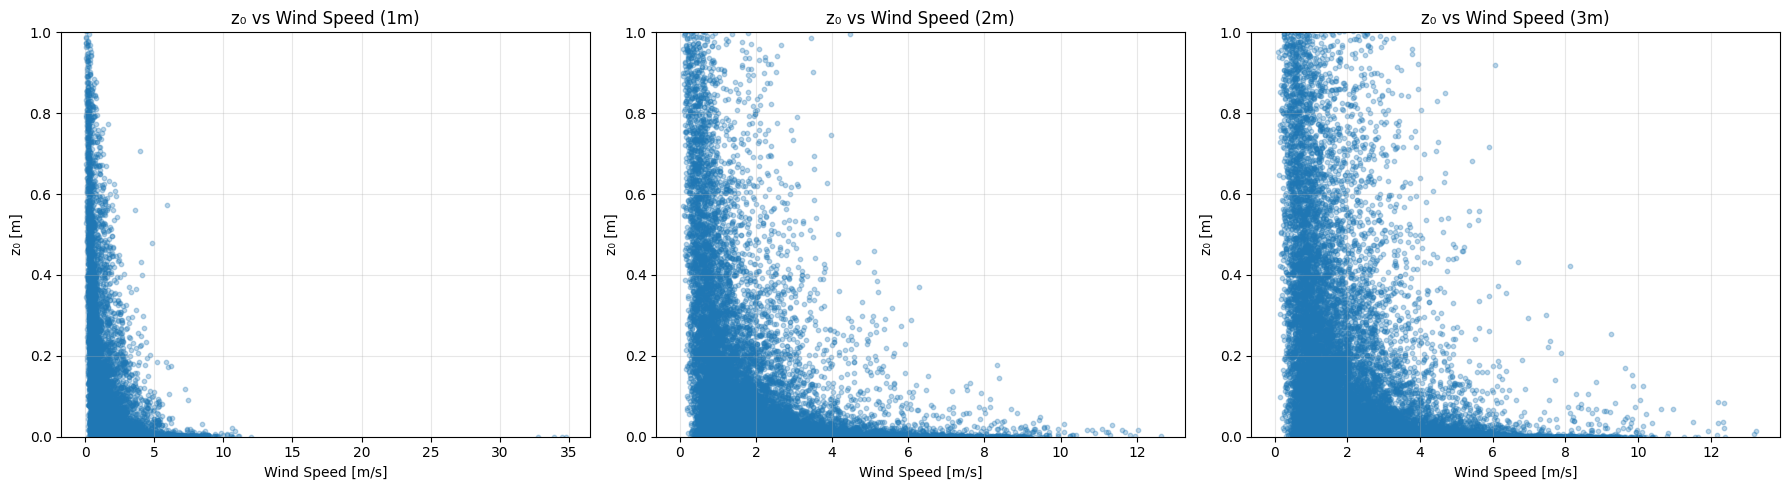

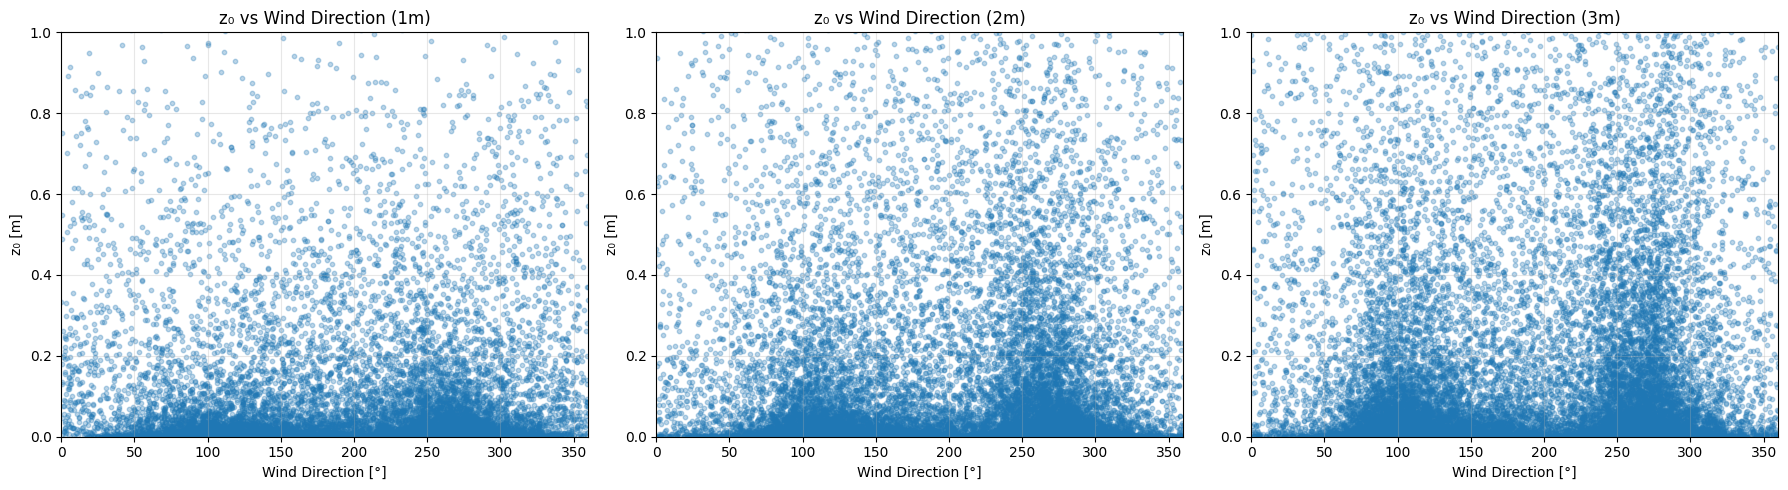

In [ ]:
def plot_z0_vs(axs, x_cols, y_col_prefix, xlabels, titles, xlims=None, ylims=None):
    heights = ['1m', '2m', '3m']
    for ax, h, xcol, xlabel, title in zip(axs, heights, x_cols, xlabels, titles):
        ax.scatter(df_clean[xcol], df_clean[f'{y_col_prefix}_{h}'], alpha=0.3, s=10)
        ax.set_xlabel(xlabel)
        ax.set_ylabel('z₀ [m]')
        ax.set_title(f'{title} ({h})')
        ax.grid(True, alpha=0.3)
        if ylims:
            ax.set_ylim(*ylims)
        if xlims:
            ax.set_xlim(*xlims)

# 1. Scatter plot: z0 vs wind speed
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 5))
plot_z0_vs(
    axes1,
    x_cols=['wind_speed_1m', 'wind_speed_2m', 'wind_speed_3m'],
    y_col_prefix='z0',
    xlabels=['Wind Speed [m/s]'] * 3,
    titles=['z₀ vs Wind Speed'] * 3,
    ylims=(0, 1),
)
plt.tight_layout()
plt.show()

# Convert wind direction to numeric once
df_clean['wind_dir_1m_num'] = pd.to_numeric(df_clean['wind_dir_1m'], errors='coerce')
df_clean['wind_dir_2m_num'] = pd.to_numeric(df_clean['wind_dir_2m'], errors='coerce')
df_clean['wind_dir_3m_num'] = pd.to_numeric(df_clean['wind_dir_3m'], errors='coerce')

# 2. Scatter plot: z0 vs wind direction
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5))
plot_z0_vs(
    axes2,
    x_cols=['wind_dir_1m_num', 'wind_dir_2m_num', 'wind_dir_3m_num'],
    y_col_prefix='z0',
    xlabels=['Wind Direction [°]'] * 3,
    titles=['z₀ vs Wind Direction'] * 3,
    xlims=(0, 360),
    ylims=(0, 1),
)
plt.tight_layout()
plt.show()

In [16]:
def z0_stats_by_direction(df, mean_direction, width, level='1m'):
    """
    Compute statistics of aerodynamic roughness length for a wind direction bin.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe containing wind direction and z0 data
    mean_direction : float
        Center of the wind direction bin (0-360 degrees)
    width : float
        Width of the wind direction bin (degrees)
    level : str
        Measurement level ('1m', '2m', or '3m')
    
    Returns:
    --------
    dict : Dictionary containing statistics (mean, median, std, min, max, count)
    """
    # Calculate bin edges
    lower = mean_direction - width/2
    upper = mean_direction + width/2
    
    # Get the appropriate columns
    wind_dir_col = f'wind_dir_{level}_num'
    z0_col = f'z0_{level}'
    
    # Handle wrap-around at 0/360 degrees
    if lower < 0:
        mask = ((df[wind_dir_col] >= (lower + 360)) | (df[wind_dir_col] <= upper))
    elif upper > 360:
        mask = ((df[wind_dir_col] >= lower) | (df[wind_dir_col] <= (upper - 360)))
    else:
        mask = ((df[wind_dir_col] >= lower) & (df[wind_dir_col] <= upper))
    
    # Filter data
    z0_filtered = df.loc[mask, z0_col].dropna()
    
    # Compute statistics
    stats = {
        'mean_direction': mean_direction,
        'width': width,
        'level': level,
        'count': len(z0_filtered),
        'mean': z0_filtered.mean(),
        'median': z0_filtered.median(),
        'std': z0_filtered.std(),
        'min': z0_filtered.min(),
        'max': z0_filtered.max(),
        'q25': z0_filtered.quantile(0.25),
        'q75': z0_filtered.quantile(0.75)
    }
    
    # Print statistics
    print(f"Aerodynamic Roughness Length Statistics")
    print(f"{'='*50}")
    print(f"Wind Direction Bin: {mean_direction}° ± {width/2}° ({lower:.1f}° - {upper:.1f}°)")
    print(f"Measurement Level: {level}")
    print(f"Sample Size: {stats['count']} points")
    print(f"\nz₀ Statistics:")
    print(f"  Mean:     {stats['mean']:.4f} m")
    print(f"  Median:   {stats['median']:.4f} m")
    print(f"  Std Dev:  {stats['std']:.4f} m")
    print(f"  Min:      {stats['min']:.4f} m")
    print(f"  Max:      {stats['max']:.4f} m")
    print(f"  Q25:      {stats['q25']:.4f} m")
    print(f"  Q75:      {stats['q75']:.4f} m")
    
    return stats

In [18]:
stats = z0_stats_by_direction(df_clean, mean_direction=100, width=30, level='3m')
stats = z0_stats_by_direction(df_clean, mean_direction=270, width=30, level='3m')


Aerodynamic Roughness Length Statistics
Wind Direction Bin: 100° ± 15.0° (85.0° - 115.0°)
Measurement Level: 3m
Sample Size: 8878 points

z₀ Statistics:
  Mean:     0.0660 m
  Median:   0.0005 m
  Std Dev:  0.2359 m
  Min:      0.0000 m
  Max:      2.9837 m
  Q25:      0.0000 m
  Q75:      0.0167 m
Aerodynamic Roughness Length Statistics
Wind Direction Bin: 270° ± 15.0° (255.0° - 285.0°)
Measurement Level: 3m
Sample Size: 4275 points

z₀ Statistics:
  Mean:     0.2151 m
  Median:   0.0461 m
  Std Dev:  0.3994 m
  Min:      0.0000 m
  Max:      2.9186 m
  Q25:      0.0082 m
  Q75:      0.2251 m
